In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import glob


## MDTB as training dataset
MDTB dataset is used for training the models. X and Y are crossed across ses-s1 and ses-s2. In other words, cortical data from ses-s2 was used to predict cerebellar data from ses-s1.

Trained models were then evaluated on new datasets 

In [6]:
def comb_eval(models=['Md_s1'],
              eval_data=["MDTB","WMFS", "Nishimoto", "Demand", "Somatotopic", "IBC"],
              cerebellum='SUIT3'):
    T = []
    for dataset in eval_data:
        for m in models:
            f = gl.conn_dir + f'/{cerebellum}/eval/{dataset}_eval_{m}.tsv'
            # get the dataframe
            dd = pd.read_csv(f, sep='\t')
            # add a column for the name of the dataset
            # get the noise ceilings
            
            # Remove negative values from dd.noise_X_R
            dd.noise_X_R = dd.noise_X_R.apply(lambda x: np.nan if x < 0 else x)
            dd.noise_Y_R = dd.noise_Y_R.apply(lambda x: np.nan if x < 0 else x)
            dd['noiseceiling_Y']=np.sqrt(dd.noise_Y_R)
            dd['noiseceiling_XY']=np.sqrt(dd.noise_Y_R)*np.sqrt(dd.noise_X_R)
            dd['R_eval_adj'] = dd.R_eval/dd["noiseceiling_XY"]
            T.append(dd)
    df = pd.concat(T,ignore_index=True)
    return df

In [7]:
df=comb_eval(models=['MDs1'])

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval'>

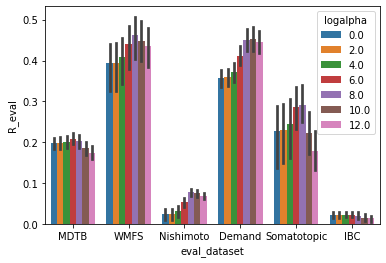

In [8]:
sns.barplot(data=df,x='eval_dataset',y='R_eval',hue='logalpha')

<AxesSubplot:xlabel='eval_dataset', ylabel='noiseceiling_XY'>

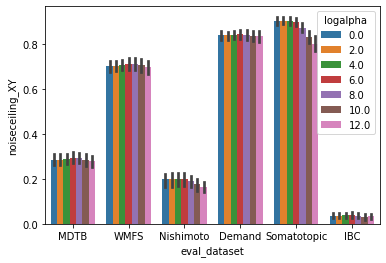

In [9]:
sns.barplot(data=df,x='eval_dataset',y='noiseceiling_XY',hue='logalpha')

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval_adj'>

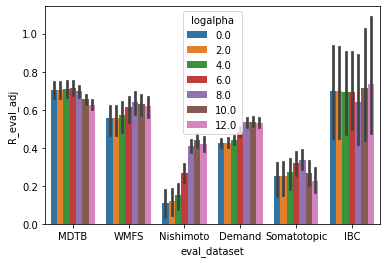

In [10]:
sns.barplot(data=df,x='eval_dataset',y='R_eval_adj',hue='logalpha')

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval_adj'>

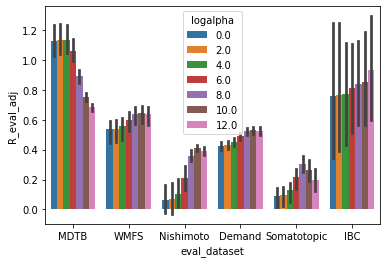

In [11]:
dfall=comb_eval(models=['MD'])
sns.barplot(data=dfall,x='eval_dataset',y='R_eval_adj',hue='logalpha')

##  All training data sets

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval'>

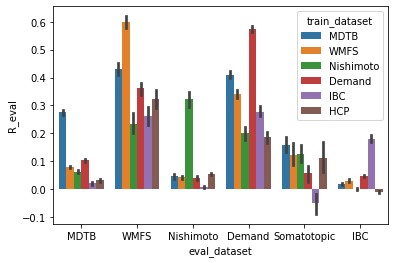

In [14]:
dfall=comb_eval(models=['Md','Wm','Ni','De','Ib','Hc'])
sns.barplot(data=dfall,x='eval_dataset',y='R_eval',hue='train_dataset')